JUNIOR ANALITIKO UŽDUOTIS. RINKIMAI

In [1134]:
#BIBLIOTEKOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1135]:
#STILIAI
font1 = {'family': 'serif',
        'color':  'darkslategray',
        'weight': 'bold',
        'size': 6,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 7,
        }

font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 8,
        }
font4 = {'family': 'serif',
        'color':  'darkmagenta',
        'weight': 'bold',
        'size': 6,
        }

spalvos = ["#AAD6E3", "#5CADC4"]

In [1136]:
#PARAMETRAI
cm = 1/2.54  # centimetrai inch'uose
atejusieji_balsuoti = [*range(0,110,10)]

Text(0.85, 51, '51% balsų')

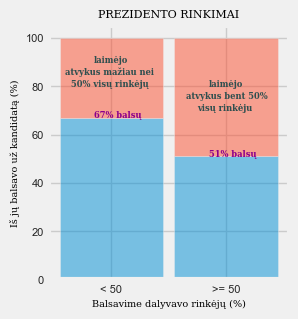

In [1137]:
#1. KANDIDATAS Į LR PREZIDENTUS BŪTŲ IŠRINKTAS PIRMAJAME RINKIMŲ TURE
#SĄLYGA: 
'''
pirmą kartą balsuojant ir dalyvaujant ne mažiau kaip pusei visų rinkėjų, gavo daugiau kaip pusę 
visų rinkimuose dalyvavusių rinkėjų balsų. 
Jeigu rinkimuose dalyvavo mažiau kaip pusė visų rinkėjų, išrinktu laikomas tas kandidatas, 
kuris gavo daugiausia, bet ne mažiau kaip vieną trečdalį visų rinkėjų balsų.
'''
#diagramos suformavimas
fig, pr = plt.subplots(figsize=(7*cm, 7*cm)) #pr - prezidento rinkimai trumpinys

#parametrų nustatymai
width = 0.9  #grafos plotis
bottom = np.zeros(2) #grafų skaičius
pr.tick_params(axis='both', which='major', labelsize=8)

rinkeju_skaicius = ('< 50', '>= 50')
balsai = { #procentų pasiskirstymas, dalyvaujant/nedalyvaujant bent 50% rinkėjų prezidento rinkimuose
    'nelaimėjo': np.array([67, 51]),
    'laimėjo': np.array([33, 49]),
}

#diagramos braižymas
for rezultatas, balsai in balsai.items():
    p = pr.bar(rinkeju_skaicius, balsai, width, label=rezultatas, bottom=bottom, alpha=0.5)
    bottom += balsai

#pridedamos tekstinės žymės
pr.set_title('PREZIDENTO RINKIMAI', fontdict = font3)
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Iš jų balsavo už kandidatą (%)', fontdict = font2)

plt.text(-0.15, 90, 'laimėjo', fontdict = font1)
plt.text(-0.4, 85, 'atvykus mažiau nei', fontdict = font1)
plt.text(-0.35, 80, '50% visų rinkėjų', fontdict = font1)
plt.text(-0.15, 67, '67% balsų', fontdict = font4)

plt.text(0.85, 80, 'laimėjo', fontdict = font1)
plt.text(0.65, 75, 'atvykus bent 50%', fontdict = font1)
plt.text(0.75, 70, 'visų rinkėju', fontdict = font1)
plt.text(0.85, 51, '51% balsų', fontdict = font4)

Text(-20, -25, '*balsai bent 1/5 piliečių, turinčių rinkimų teisę')

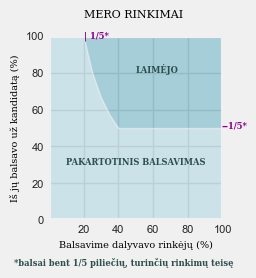

In [1138]:
#2. MERO POSTO RINKIMŲ DIAGRAMA
#SĄLYGA:
'''
išrinktu laikomas kandidatas, kuris pirmą kartą balsuojant gavo daugiau kaip pusę rinkimuose dalyvavusių rinkėjų balsų, 
jeigu rinkimuose dalyvavo ne mažiau kaip 40 procentų į tos rinkimų apygardos rinkėjų sąrašus įrašytų rinkėjų.
jeigu rinkimuose dalyvavo mažiau kaip 40 procentų į tos rinkimų apygardos rinkėjų sąrašus įrašytų rinkėjų, išrinktu laikomas kandidatas, 
kuris gavo daugiausia, bet ne mažiau kaip 1/5 visų į tos rinkimų apygardos rinkėjų sąrašus įrašytų rinkėjų balsų.
'''
#diagramos suformavimas
fig, mr = plt.subplots() #mr - mero rinkimų trumpinys

#parametrų nustatymai
balsuojanciu_skaicius = [*range(0,101,5)]
color_map = spalvos
def atvyke_balsuoti(x):
    if x < 20 :
        return 100
    elif x < 40 :
        return 20/x*100 #naudojama atvirkštinio proporcingumo funkcija f(x) = k/x, kur k = 20 (1/5 piliečių, turinčių rinkimų teisę)
    else:
        return 50

atejusiuju_balsu_sk = []
for item in balsuojanciu_skaicius:
   atejusiuju_balsu_sk.append(atvyke_balsuoti(item)) #išskaičiuojami minimalūs reikalingi balsai, pagal atėjųsiųjų balsuotojų skaičių

x = balsuojanciu_skaicius
y5 = atejusiuju_balsu_sk
y6 = []
for item in balsuojanciu_skaicius:
   y6.append(100)
y = np.vstack([y5, y6])

#diagramos braižymas
mr.stackplot(x, y, linewidth=1.0, colors = color_map, alpha=0.5)
mr.tick_params(axis='both', which='major', labelsize=8)
mr.set(xlim=(0, 100),
       ylim=(0, 100))

#pridedamos tekstinės žymės
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Iš jų balsavo už kandidatą (%)', fontdict = font2)
plt.text(20, 110, 'MERO RINKIMAI', fontdict = font3)
plt.xticks(np.arange(20, 120, 20))
plt.yticks(np.arange(0, 120, 20))
plt.text(50, 80, 'LAIMĖJO', fontdict = font1)
plt.text(10, 30, 'PAKARTOTINIS BALSAVIMAS', fontdict = font1)
plt.text(20, 99, '| 1/5*', fontdict = font4)
plt.text(99, 50, '--1/5*', fontdict = font4)
plt.text(-20, -25, '*balsai bent 1/5 piliečių, turinčių rinkimų teisę', fontdict = font1)

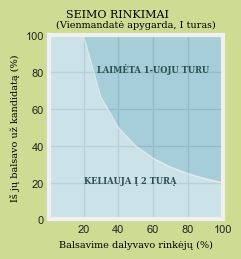

In [1139]:
#3. KANDIDATAS Į SEIMO NARIO POSTĄ BŪTŲ IŠRINKTAS VIENMANDATĖJE APYGARDOJE PIRMAJAME RINKIMŲ TURE
#SĄLYGA:
'''
išrinktu laikomas daugiausia rinkimuose dalyvavusių rinkėjų balsų gavęs kandidatas, 
bet ne mažiau kaip 1/5 visų į tos rinkimų apygardos rinkėjų sąrašus įrašytų rinkėjų balsų
'''
#diagramos suformavimas
fig, sr = plt.subplots() #sr - seimo nario rinkimų trumpinys

#parametrų nustatymai
color_map = spalvos
def ateje_balsuoti(x):
    if x <20 :
        return 100
    else:
        return 20/x*100 #naudojama atvirkštinio proporcingumo funkcija balsų paskaičiavimui f(x) = k/x, kur k = 20

atejusiuju_balsu_skaicius = []
for item in atejusieji_balsuoti:
   atejusiuju_balsu_skaicius.append(ateje_balsuoti(item)) #išskaičiuojami minimalūs reikalingi balsai, pagal atėjųsiųjų balsuotojų skaičių

x = atejusieji_balsuoti
ay = atejusiuju_balsu_skaicius
by = []
for item in atejusieji_balsuoti:
   by.append(100)
y = np.vstack([ay, by])

#diagramos braižymas
sr.stackplot(x, y, linewidth=1.0, colors = color_map, alpha=0.5)
sr.tick_params(axis='both', which='major', labelsize=8)
sr.tick_params(axis='both', which='minor', labelsize=10)
sr.set(xlim=(0, 100),
       ylim=(0, 100))

#pridedamos tekstinės žymės
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Iš jų balsavo už kandidatą (%)', fontdict = font2)
plt.text(10, 110, 'SEIMO RINKIMAI', fontdict = font3)
plt.title('(Vienmandatė apygarda, I turas)', fontdict = font2)
plt.xticks(np.arange(20, 120, 20))
plt.yticks(np.arange(0, 120, 20))
plt.text(27.5, 80, 'LAIMĖTA 1-UOJU TURU', fontdict = font1)
plt.text(20, 20, 'KELIAUJA Į 2 TURĄ', fontdict = font1)

#nustatoma fono spalva ir skaidrumas
fig.patch.set_alpha(0.7)
fig.patch.set_facecolor('#BACD66')

Text(0.1, 0.3, '>= 50%')

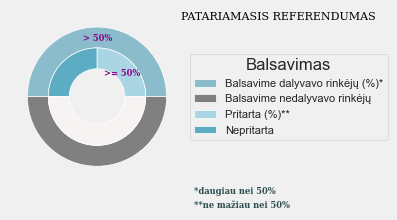

In [1140]:
## 4. KONSULTACINIAME REFERENDUME BŪTŲ SĖKMINGAI PRITARTA REFERENDUMUI PATEIKTO SPRENDIMO PRIĖMIMUI
#SĄLYGA:
'''
kai patariamajame referendume dalyvavo daugiau kaip pusė turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą piliečių 
ir šiam referendumui pateiktam sprendimui pritarė ne mažiau kaip pusė jame dalyvavusių piliečių
'''
#diagramos suformavimas
fig, kr = plt.subplots() #kr - konsultacinio referendumo trumpinys

#parametrų nustatymai
salygos = ["Balsavime dalyvavo rinkėjų (%)*",
          "Balsavime nedalyvavo rinkėjų",
          "Pritarta (%)**",
          "Nepritarta"
          ]
size = 0.3 #diagramos dydis
vals = np.array([[50., 50.], [0., 100.]]) #vidinio ir išorinio žiedų dalinimas

#spalvų nustatymas
cmap = plt.colormaps["tab20c"]
outer_colors = ["#8ABCCB", 'grey']
inner_colors = ['#AAD6E3', '#5CADC4', '#F7F3F3', '#F7F3F3']

#diagramos braižymas
#1. išorinio žiedo braižymas
kr.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
#2. vidinio žiedo braižymas
kr.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

#legendos formavimas
kr.legend(salygos,
          title="Balsavimas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop = { "size": 8 })

#pridedamos tekstinės žymės
plt.text(1.2, 1.1, 'PATARIAMASIS REFERENDUMAS', fontdict = font3)
plt.text(1.4, -1.4, '*daugiau nei 50%', fontdict = font1)
plt.text(1.4, -1.6, '**ne mažiau nei 50%', fontdict = font1)
plt.text(-0.2, 0.8, '> 50%', fontdict = font4)
plt.text(0.1, 0.3, '>= 50%', fontdict = font4)

Text(-20, -25, '*balsavus bent 1/3 piliečių, turinčių rinkimų teisę')

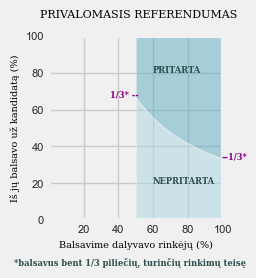

In [1141]:
#5. PRIVALOMAJAME REFERENDUME BŪTŲ SĖKMINGAI PRITARTA
#SĄLYGA:
'''
Privalomasis referendumas laikomas įvykusiu, jeigu jame dalyvavo daugiau kaip pusė piliečių, 
turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
Sprendimas dėl kitų klausimų, įstatymų ar jų nuostatų, dėl kurių buvo sprendžiama privalomajame referendume, 
yra laikomas priimtu, jeigu tam pritarė daugiau kaip pusė piliečių, dalyvavusių referendume, bet ne mažiau kaip 1/3 piliečių, 
turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
'''
#diagramos suformavimas
fig, pref = plt.subplots() #pref - privalomojo referendumo trumpinys

#parametrų nustatymai
balsuojanciuju_skaicius = [*range(50,101,2)] #kadangi referendumas laikomas įvykusiu, kai dalyvauja ne mažiau 50% rinkėjų, skaičiuojamas rėžis nuo 50
color_map = spalvos
def atvyke_balsuoti(x):
    if x < 20 :
        return 100
    else:
        return (100/3)/x*100 #naudojama atvirkštinio proporcingumo funkcija f(x) = k/x, kur k = 100/3 (1/3 piliečių, turinčių rinkimų teisę)

atejusiuju_balsu_sk = []
for item in balsuojanciuju_skaicius:
   atejusiuju_balsu_sk.append(atvyke_balsuoti(item)) #išskaičiuojami minimalūs reikalingi balsai, pagal atėjųsiųjų balsuotojų skaičių

x = balsuojanciuju_skaicius
y3 = atejusiuju_balsu_sk
y4 = []
for item in balsuojanciuju_skaicius:
   y4.append(100)
y = np.vstack([y3, y4])

#diagramos braižymas
pref.stackplot(x, y, linewidth=1.0, colors = color_map, alpha=0.5)
pref.tick_params(axis='both', which='major', labelsize=8)
pref.tick_params(axis='both', which='minor', labelsize=10)
pref.set(xlim=(0, 100),
       ylim=(0, 100))

#pridedamos tekstinės žymės
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Iš jų balsavo už kandidatą (%)', fontdict = font2)
plt.text(-5, 110, 'PRIVALOMASIS REFERENDUMAS', fontdict = font3)
plt.xticks(np.arange(20, 120, 20))
plt.yticks(np.arange(0, 120, 20))
plt.text(60, 80, 'PRITARTA', fontdict = font1)
plt.text(60, 20, 'NEPRITARTA', fontdict = font1)
plt.text(35, 67, '1/3* --', fontdict = font4)
plt.text(99, 33, '--1/3*', fontdict = font4)
plt.text(-20, -25, '*balsavus bent 1/3 piliečių, turinčių rinkimų teisę', fontdict = font1)

Text(30, 25, 'NEPRITARTA')

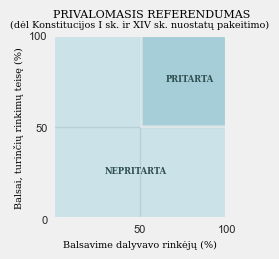

In [1142]:
#6. PRIVALOMAJAME REFERENDUME BŪTŲ SĖKMINGAI PRITARTA DĖL KONSTITUCIJOS XIV SKIRSNIO NUOSTATŲ PAKEITIMO
#SĄLYGA:
'''
Privalomasis referendumas laikomas įvykusiu, jeigu jame dalyvavo daugiau kaip pusė piliečių, 
turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
Laikomas priimtu, jeigu tam pritarė daugiau kaip pusė piliečių, turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
'''
#diagramos suformavimas
fig, ksk = plt.subplots() #ksk - privalomo referendumo konstitucijos skirsnių trumpinys

#parametrų nustatymai. Priskiriami galimi balsų rezultatai, įtakojantys galutinio rezultato lemtį
ateje_rinkejai = [0, 51, 51, 100]
balsai = [100, 100, 51, 51]
x = ateje_rinkejai
y1 = balsai
y2 = [0, 0, 100, 100]
y = np.vstack([y1, y2])
color_map = spalvos

#diagramos braižymas
ksk.stackplot(x, y, linewidth=2.0, colors = color_map, alpha=0.5)
ksk.tick_params(axis='both', which='major', labelsize=8)
ksk.set(xlim=(0, 100),
        ylim=(0, 100))

#pridedamos tekstinės žymės
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Balsai, turinčių rinkimų teisę (%)', fontdict = font2)
plt.text(0, 110, 'PRIVALOMASIS REFERENDUMAS', fontdict = font3)
plt.title('(dėl Konstitucijos I sk. ir XIV sk. nuostatų pakeitimo)', fontdict = font2)
plt.xticks(np.arange(50, 120, 50))
plt.yticks(np.arange(0, 120, 50))
plt.text(65, 75, 'PRITARTA', fontdict = font1)
plt.text(30, 25, 'NEPRITARTA', fontdict = font1)

Text(30, 35, 'NEPRITARTA')

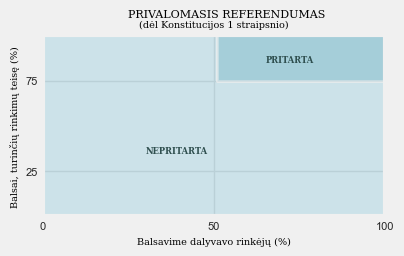

In [1143]:
#7. PRIVALOMAJAME REFERENDUME BŪTŲ SĖKMINGAI PRITARTA DĖL KONSTITUCIJOS 1 STRAIPSNIO NUOSTATOS PAKEITIMO
#SĄLYGA:
'''
Privalomasis referendumas laikomas įvykusiu, jeigu jame dalyvavo daugiau kaip pusė piliečių, 
turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
Laikomas priimtu, jeigu tam pritarė ne mažiau kaip 3/4 piliečių, turinčių rinkimų teisę ir įrašytų į rinkėjų sąrašą.
'''
#diagramos suformavimas
fig, ks = plt.subplots(figsize=(10*cm, 5*cm)) #ks - privalomo referendumo konstitucijos straipsnio trumpinys

#parametrų nustatymai. Priskiriami galimi balsų rezultatai, įtakojantys galutinio rezultato lemtį
atvyke_rinkejai = [0, 51, 51, 100]
balsu_sk = [100, 100, 75, 75]
x = atvyke_rinkejai
ay = balsu_sk
by = [0, 0, 100, 100]
y = np.vstack([ay, by])
color_map = spalvos

#diagramos braižymas
ks.stackplot(x, y, linewidth=2.0, colors = color_map, alpha=0.5)
ks.tick_params(axis='both', which='major', labelsize=8)
ks.set(xlim=(0, 100),
       ylim=(0, 100))

#pridedamos tekstinės žymės
plt.xlabel('Balsavime dalyvavo rinkėjų (%)', fontdict = font2)
plt.ylabel('Balsai, turinčių rinkimų teisę (%)', fontdict = font2)
plt.text(25, 110, 'PRIVALOMASIS REFERENDUMAS', fontdict = font3)
plt.title('(dėl Konstitucijos 1 straipsnio)', fontdict = font2)
plt.xticks(np.arange(0, 101, 50))
plt.yticks(np.arange(25, 101, 50))
plt.text(65, 85, 'PRITARTA', fontdict = font1)
plt.text(30, 35, 'NEPRITARTA', fontdict = font1)